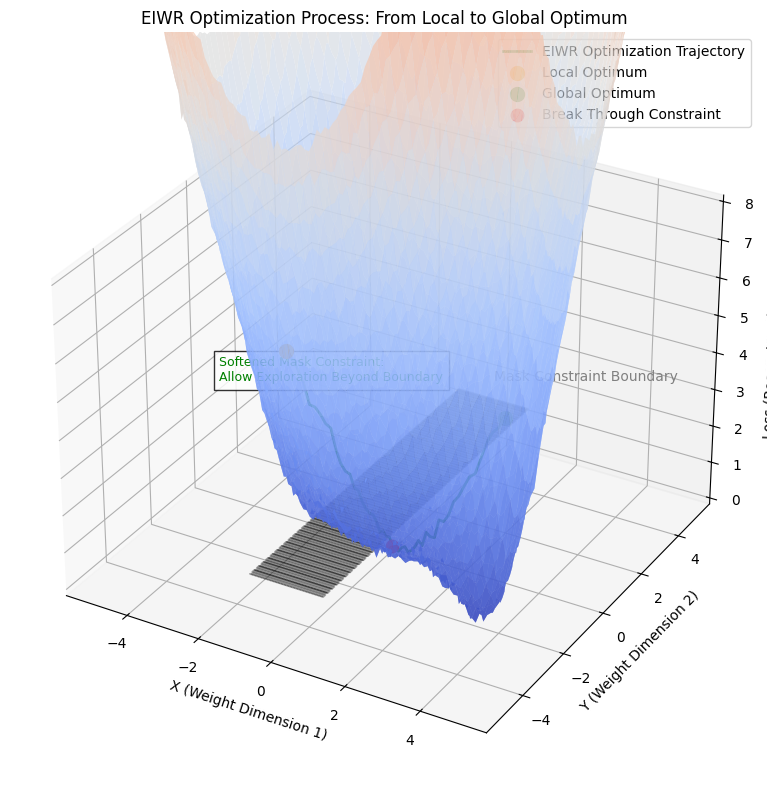

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# --------------------------
# 1. 数据生成（地形与轨迹）
# --------------------------
# 生成网格（地形坐标）
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# 定义地形高度（损失值）：两个低谷（局部最优+全局最优）
# 全局最优（右侧）损失低于局部最优（左侧）
Z = 0.5 * (X**2 + Y**2)  # 基础曲面
Z -= 3 * np.exp(-((X + 3)**2 + (Y)** 2) / 2)  # 局部最优（左侧低谷）
Z -= 5 * np.exp(-((X - 3)**2 + (Y)** 2) / 2)  # 全局最优（右侧低谷，更深）
Z += 0.1 * np.random.randn(*X.shape)  # 轻微噪声模拟真实优化场景

# 定义小球轨迹（从局部最优到全局最优，中途突破约束）
t = np.linspace(0, 1, 50)
# 轨迹：先在局部最优附近，然后向全局最优移动（中途跨越约束边界）
traj_x = -3 + 6 * t  # 从x=-3（局部）到x=3（全局）
traj_y = 0.5 * np.sin(2 * np.pi * t)  # 轻微波动模拟探索
traj_z = [Z[np.argmin(np.abs(x - tx)), np.argmin(np.abs(y - ty))] for tx, ty in zip(traj_x, traj_y)]

# 定义mask约束边界（局部与全局之间的障碍）
boundary_x = np.linspace(-1, 1, 50)  # 约束边界x范围（局部与全局之间）
boundary_y = np.linspace(-5, 5, 50)
bx, by = np.meshgrid(boundary_x, boundary_y)
bz = 1.5 + 0 * bx  # 约束边界高度（半透明墙）


# --------------------------
# 2. 绘图设置
# --------------------------
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# --------------------------
# 3. 绘制核心元素
# --------------------------
# 3.1 绘制地形（损失曲面）
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.7, 
                       linewidth=0, antialiased=True)
ax.set_zlim(0, 8)  # 限制高度范围，突出低谷

# 3.2 绘制mask约束边界（半透明墙，体现"约束障碍"）
boundary = ax.plot_surface(bx, by, bz, color='gray', alpha=0.3, 
                           linestyle='--', edgecolor='black')
ax.text(0, 5, 2, 'Mask Constraint Boundary', color='gray', fontsize=10)

# 3.3 绘制小球轨迹（EIWR优化路径）
# 轨迹线
ax.plot(traj_x, traj_y, traj_z, 'g-', linewidth=2, label='EIWR Optimization Trajectory')
# 起点（局部最优）
ax.scatter(traj_x[0], traj_y[0], traj_z[0], color='orange', s=100, label='Local Optimum')
# 终点（全局最优）
ax.scatter(traj_x[-1], traj_y[-1], traj_z[-1], color='green', s=100, label='Global Optimum')
# 突破约束的关键点
cross_idx = np.argmin(np.abs(traj_x))  # 跨越边界的位置（x≈0处）
ax.scatter(traj_x[cross_idx], traj_y[cross_idx], traj_z[cross_idx], 
           color='red', s=80, label='Break Through Constraint')

# --------------------------
# 4. 标注与美化
# --------------------------
ax.set_xlabel('X (Weight Dimension 1)', fontsize=10)
ax.set_ylabel('Y (Weight Dimension 2)', fontsize=10)
ax.set_zlabel('Loss (Reconstruction Error)', fontsize=10)
ax.set_title('EIWR Optimization Process: From Local to Global Optimum', fontsize=12)
ax.legend(loc='upper right')

# 添加方法逻辑标注（对应论文中"弱化约束允许探索"）
ax.text(-3, -3, 5, 'Softened Mask Constraint: \nAllow Exploration Beyond Boundary', 
        color='green', fontsize=9, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

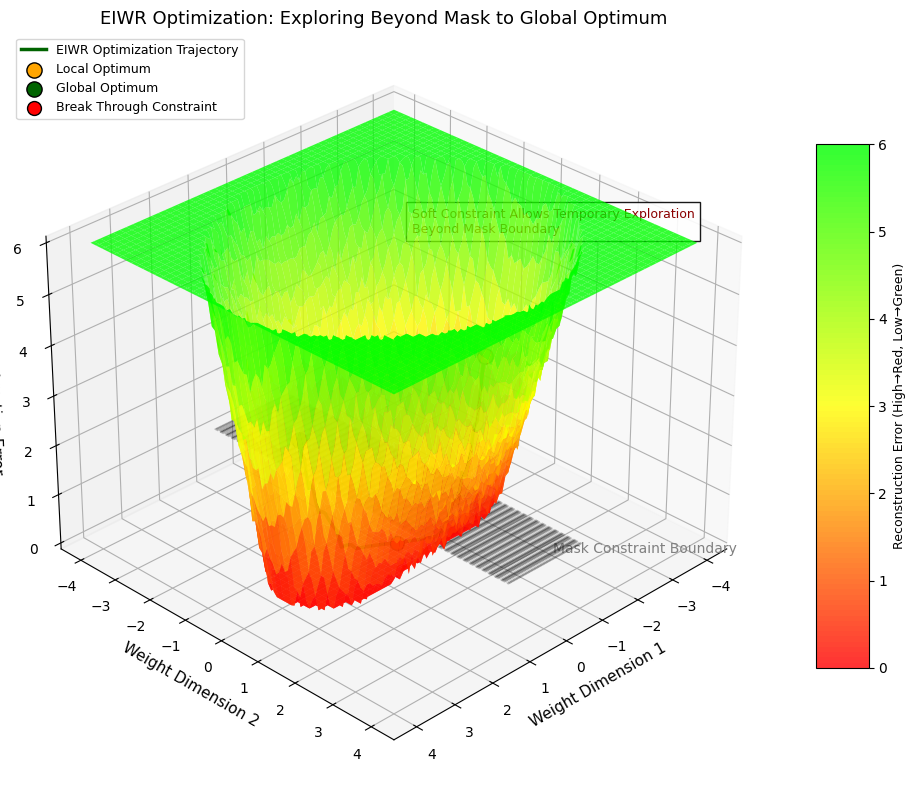

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap

# --------------------------
# 1. 数据生成（地形与轨迹）
# --------------------------
# 生成网格（缩小范围避免边缘超出）
x = np.linspace(-4, 4, 100)  # 原范围-5~5调整为-4~4，减少边缘溢出
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

# 定义地形高度（损失值）：局部最优+全局最优
Z = 0.5 * (X**2 + Y**2)  # 基础曲面
Z -= 3 * np.exp(-((X + 2.5)**2 + (Y)** 2) / 2)  # 局部最优（左移避免边缘）
Z -= 5 * np.exp(-((X - 2.5)**2 + (Y)** 2) / 2)  # 全局最优（右移避免边缘）
Z += 0.1 * np.random.randn(*X.shape)  # 轻微噪声
Z = np.clip(Z, 0, 6)  # 限制高度范围，避免极端值导致显示异常

# 定义小球轨迹（从局部到全局最优）
t = np.linspace(0, 1, 50)
traj_x = -2.5 + 5 * t  # 对应调整后的最优解位置
traj_y = 0.5 * np.sin(2 * np.pi * t)
traj_z = [Z[np.argmin(np.abs(x - tx)), np.argmin(np.abs(y - ty))] for tx, ty in zip(traj_x, traj_y)]

# 定义mask约束边界（局部与全局之间）
boundary_x = np.linspace(-1, 1, 50)
boundary_y = np.linspace(-4, 4, 50)  # 对应网格y范围
bx, by = np.meshgrid(boundary_x, boundary_y)
bz = 1.2 + 0 * bx  # 降低边界高度，避免遮挡轨迹


# --------------------------
# 2. 自定义配色（红到绿渐变：损失高→红，损失低→绿）
# --------------------------
colors = [(1, 0, 0), (1, 1, 0), (0, 1, 0)]  # 红→黄→绿
n_bins = 100
cmap_red_green = LinearSegmentedColormap.from_list('red_green', colors, N=n_bins)


# --------------------------
# 3. 绘图设置
# --------------------------
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 调整视角，避免边缘遮挡（关键解决显示超出问题）
ax.view_init(elev=30, azim=45)  #  elevation=仰角，azimuth=方位角


# --------------------------
# 4. 绘制核心元素
# --------------------------
# 4.1 绘制地形（红到绿渐变：损失高→红，损失低→绿）
surf = ax.plot_surface(X, Y, Z, cmap=cmap_red_green, alpha=0.8,
                       linewidth=0, antialiased=True)
ax.set_zlim(0, 6)  # 匹配Z的clip范围，避免空白区域

# 4.2 绘制mask约束边界（半透明灰色墙）
boundary = ax.plot_surface(bx, by, bz, color='gray', alpha=0.2,
                           linestyle='--', edgecolor='black')
ax.text(0, 4.2, 1.5, 'Mask Constraint Boundary', color='gray', fontsize=10)

# 4.3 绘制EIWR优化轨迹
ax.plot(traj_x, traj_y, traj_z, 'darkgreen', linewidth=2.5, label='EIWR Optimization Trajectory')
# 起点（局部最优）：橙色标记
ax.scatter(traj_x[0], traj_y[0], traj_z[0], color='orange', s=120, edgecolors='black', label='Local Optimum')
# 终点（全局最优）：深绿色标记
ax.scatter(traj_x[-1], traj_y[-1], traj_z[-1], color='darkgreen', s=120, edgecolors='black', label='Global Optimum')
# 突破约束关键点：红色标记
cross_idx = np.argmin(np.abs(traj_x))
ax.scatter(traj_x[cross_idx], traj_y[cross_idx], traj_z[cross_idx],
           color='red', s=100, edgecolors='black', label='Break Through Constraint')


# --------------------------
# 5. 标注与美化
# --------------------------
ax.set_xlabel('Weight Dimension 1', fontsize=11)
ax.set_ylabel('Weight Dimension 2', fontsize=11)
ax.set_zlabel('Reconstruction Error', fontsize=11)
ax.set_title('EIWR Optimization: Exploring Beyond Mask to Global Optimum', fontsize=13)
ax.legend(loc='upper left', fontsize=9)

# 添加方法逻辑标注（对应论文中Global Soft Constraint的设计）
ax.text(-3.5, -3, 4, 'Soft Constraint Allows Temporary Exploration\nBeyond Mask Boundary',
        color='darkred', fontsize=9, bbox=dict(facecolor='white', alpha=0.9))

# 添加色条说明损失与颜色的对应
cbar = fig.colorbar(surf, ax=ax, shrink=0.7, aspect=10)
cbar.set_label('Reconstruction Error (High→Red, Low→Green)', fontsize=9)

plt.tight_layout()
plt.show()

ValueError: 'gray--' is not a valid format string (two color symbols)

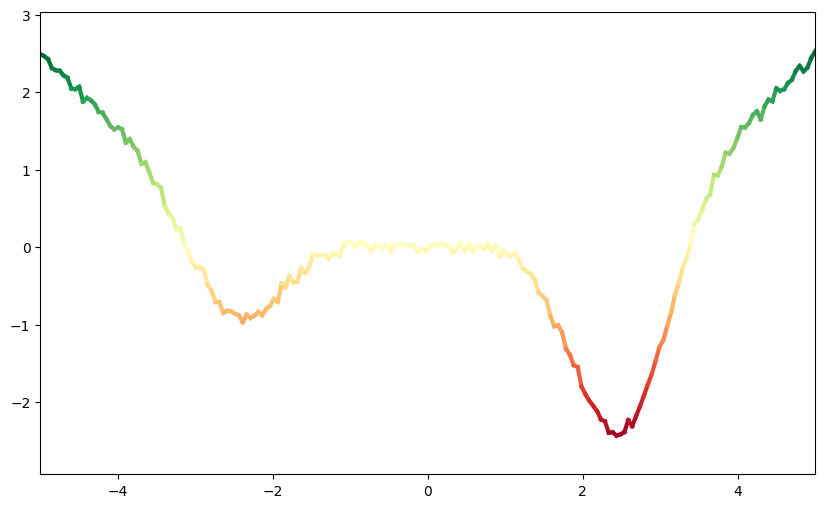

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation  # 用于模拟小球滚动

# --------------------------
# 1. 数据生成（优化曲线与轨迹）
# --------------------------
# 定义x轴（优化迭代方向）
x = np.linspace(-5, 5, 200)

# 定义损失曲线（含局部最优和全局最优，全局最优损失更低）
# 基础曲线 + 局部最优低谷 + 全局最优低谷
y = 0.1 * (x**2)  # 基础趋势
y -= 1.5 * np.exp(-((x + 2.5)** 2) / 0.8)  # 左侧局部最优
y -= 3 * np.exp(-((x - 2.5)**2) / 0.8)     # 右侧全局最优（更深）
y += 0.05 * np.random.randn(len(x))  # 轻微噪声模拟真实场景

# 定义小球滚动轨迹（从局部最优到全局最优）
t = np.linspace(0, 1, 100)
traj_x = -2.5 + 5 * t  # 从局部最优（x=-2.5）到全局最优（x=2.5）
# 轨迹y值对应损失曲线上的点
traj_y = [y[np.argmin(np.abs(x - tx))] for tx in traj_x]

# 定义mask约束边界（局部与全局之间的障碍）
boundary_x = 0  # 约束边界位置（x=0处）
boundary_ymin = min(y) - 0.2
boundary_ymax = max(y) + 0.2


# --------------------------
# 2. 绘图设置
# --------------------------
fig, ax = plt.subplots(figsize=(10, 6))

# 设置坐标轴范围（避免边缘溢出）
ax.set_xlim(-5, 5)
ax.set_ylim(min(y) - 0.5, max(y) + 0.5)

# --------------------------
# 3. 绘制核心元素
# --------------------------
# 3.1 绘制损失曲线（红到绿渐变：损失高→红，损失低→绿）
# 为曲线每个点分配颜色（根据y值归一化）
norm = plt.Normalize(y.min(), y.max())
colors = plt.cm.RdYlGn(norm(y))  # 红→黄→绿配色
for i in range(len(x)-1):
    ax.plot(x[i:i+2], y[i:i+2], color=colors[i], linewidth=3)

# 3.2 绘制mask约束边界（虚线，局部与全局的障碍）
ax.plot([boundary_x, boundary_x], [boundary_ymin, boundary_ymax],
        'gray--', linewidth=2, label='Mask Constraint Boundary')

# 3.3 标记关键位置
ax.scatter(-2.5, y[np.argmin(np.abs(x + 2.5))], color='orange', s=100, 
           edgecolors='black', label='Local Optimum')  # 局部最优
ax.scatter(2.5, y[np.argmin(np.abs(x - 2.5))], color='green', s=100, 
           edgecolors='black', label='Global Optimum')  # 全局最优

# 3.4 初始化小球（用于动画）
ball, = ax.plot([], [], 'ro', markersize=10, markeredgecolor='black')


# --------------------------
# 4. 动画函数（模拟小球滚动）
# --------------------------
def update(frame):
    # 更新小球位置
    ball.set_data(traj_x[frame], traj_y[frame])
    # 突出突破约束的时刻（x≈0处）
    if frame == np.argmin(np.abs(traj_x)):
        ball.set_color('purple')  # 突破时变为紫色
    else:
        ball.set_color('red')
    return ball,


# 创建动画（100帧，每帧间隔50ms）
ani = FuncAnimation(fig, update, frames=len(traj_x), interval=50, blit=True)

# --------------------------
# 5. 标注与美化
# --------------------------
ax.set_xlabel('Optimization Direction (Weight Refinement Step)', fontsize=10)
ax.set_ylabel('Reconstruction Error', fontsize=10)
ax.set_title('EIWR Optimization Trajectory (2D)', fontsize=12)
ax.legend(loc='upper right')

# 添加方法逻辑标注（对应文档中全局软约束的设计）
ax.text(-4.5, max(y) + 0.2, 
        'Soft Constraint: Temporarily Explore Beyond Mask\n(Allows Escape from Local Optimum)',
        color='darkgreen', fontsize=9, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# 如需保存动画（可选）
# ani.save('eiwr_optimization.gif', writer='pillow', fps=20)

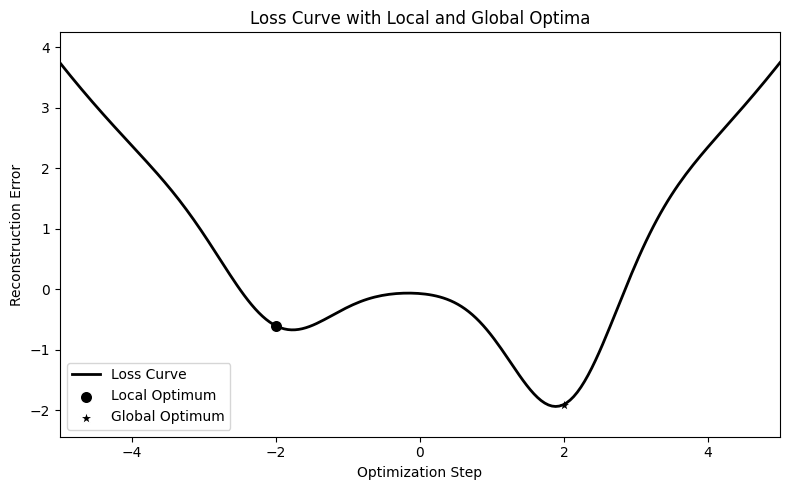

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 生成x轴数据（优化迭代方向）
x = np.linspace(-5, 5, 200)

# 定义损失曲线（含局部最优和全局最优）
# 基础曲线 + 局部最优低谷 + 全局最优低谷（全局最优损失更低）
y = 0.15 * (x ** 2)  # 基础趋势
y -= 1.2 * np.exp(-((x + 2) **2) / 1)  # 左侧局部最优
y -= 2.5 * np.exp(-((x - 2)** 2) / 1)  # 右侧全局最优

# --------------------------
# 绘图设置
# --------------------------
plt.figure(figsize=(8, 5))

# 绘制损失曲线（黑色实线，简洁清晰）
plt.plot(x, y, 'k-', linewidth=2, label='Loss Curve')

# 标记局部最优和全局最优
local_x = -2
local_y = y[np.argmin(np.abs(x - local_x))]
global_x = 2
global_y = y[np.argmin(np.abs(x - global_x))]

plt.scatter(local_x, local_y, color='k', s=80, edgecolors='white', label='Local Optimum')
plt.scatter(global_x, global_y, color='k', s=100, edgecolors='white', marker='*', label='Global Optimum')

# 标注坐标轴和标题
plt.xlabel('Optimization Step')
plt.ylabel('Reconstruction Error')
plt.title('Loss Curve with Local and Global Optima')
plt.legend()

# 调整范围，确保曲线完整显示
plt.xlim(-5, 5)
plt.ylim(min(y) - 0.5, max(y) + 0.5)

plt.tight_layout()
plt.show()

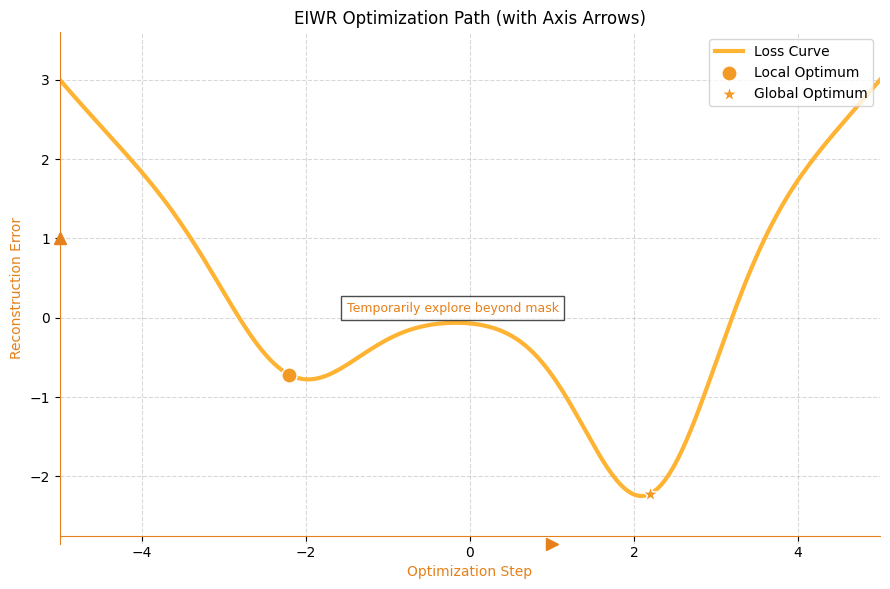

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow

# --------------------------
# 1. 数据生成（损失曲线）
# --------------------------
x = np.linspace(-5, 5, 200)
y = 0.12 * (x**2)  # 基础曲面
y -= 1.3 * np.exp(-((x + 2.2)** 2) / 1.2)  # 局部最优（左侧）
y -= 2.8 * np.exp(-((x - 2.2)**2) / 1.2)  # 全局最优（右侧）

local_x, local_y = -2.2, y[np.argmin(np.abs(x + 2.2))]
global_x, global_y = 2.2, y[np.argmin(np.abs(x - 2.2))]


# --------------------------
# 2. 绘图设置（莫奈橙色系）
# --------------------------
plt.figure(figsize=(9, 6))
monet_orange = (1, 0.7, 0.2)    # 曲线颜色
marker_color = (0.95, 0.6, 0.15)# 标记点颜色
arrow_color = (0.9, 0.5, 0.1)   # 坐标轴箭头颜色


# --------------------------
# 3. 绘制核心元素
# --------------------------
# 3.1 网格背景
plt.grid(True, linestyle='--', alpha=0.3, color='gray')

# 3.2 损失曲线
plt.plot(x, y, color=monet_orange, linewidth=3, label='Loss Curve')

# 3.3 标记最优解
plt.scatter(local_x, local_y, color=marker_color, s=120, 
           edgecolors='white', zorder=5, label='Local Optimum')
plt.scatter(global_x, global_y, color=marker_color, s=150, 
           edgecolors='white', marker='*', zorder=5, label='Global Optimum')


# --------------------------
# 4. 坐标轴箭头（核心调整）
# --------------------------
# 移除默认坐标轴，替换为带箭头的坐标轴
ax = plt.gca()
ax.spines['top'].set_visible(False)    # 隐藏上边框
ax.spines['right'].set_visible(False)  # 隐藏右边框

# x轴箭头（底部）
ax.spines['bottom'].set_position(('data', min(y)-0.5))  # 调整x轴位置
ax.spines['bottom'].set_color(arrow_color)
ax.plot(1, 0, ls='', marker='>', ms=8, color=arrow_color, transform=ax.get_xaxis_transform(), clip_on=False)

# y轴箭头（左侧）
ax.spines['left'].set_position(('data', -5))  # 调整y轴位置
ax.spines['left'].set_color(arrow_color)
ax.plot(0, 1, ls='', marker='^', ms=8, color=arrow_color, transform=ax.get_yaxis_transform(), clip_on=False)


# --------------------------
# 5. 标注与优化
# --------------------------
plt.xlabel('Optimization Step', fontsize=10, color=arrow_color)
plt.ylabel('Reconstruction Error', fontsize=10, color=arrow_color)
plt.title('EIWR Optimization Path (with Axis Arrows)', fontsize=12)
plt.legend(loc='upper right')

# 标注优化逻辑（对应EIWR允许暂时跳出mask约束）
plt.text(-1.5, local_y + 0.8, 'Temporarily explore beyond mask', 
         color=arrow_color, fontsize=9, bbox=dict(facecolor='white', alpha=0.7))

plt.xlim(-5, 5)
plt.ylim(min(y)-0.6, max(y)+0.6)
plt.tight_layout()
plt.show()

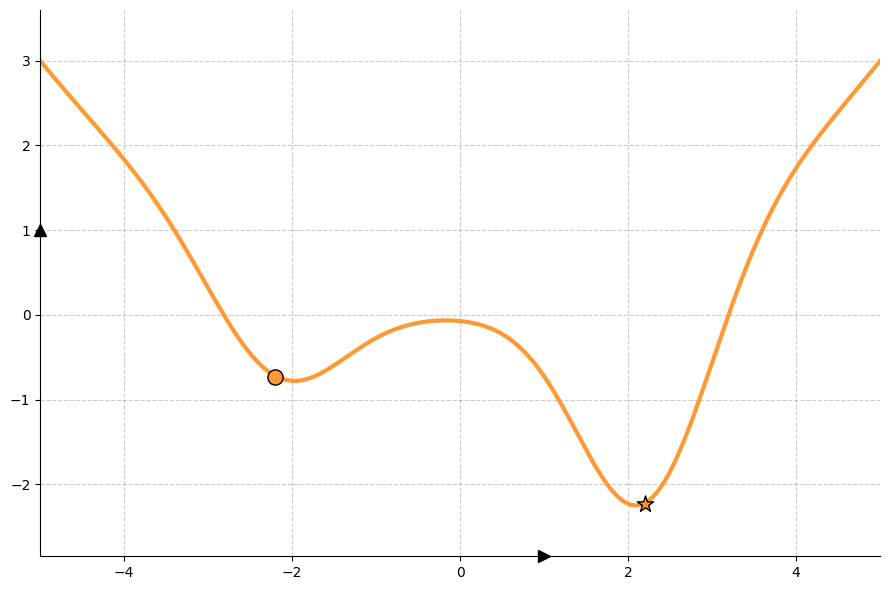

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# 1. 数据生成（损失曲线）
# --------------------------
x = np.linspace(-5, 5, 200)
# 定义损失曲线（局部最优+全局最优，全局最优损失更低）
y = 0.12 * (x**2)  # 基础曲面
y -= 1.3 * np.exp(-((x + 2.2)** 2) / 1.2)  # 左侧局部最优
y -= 2.8 * np.exp(-((x - 2.2)**2) / 1.2)  # 右侧全局最优（损失更低）

# 标记关键位置
local_x, local_y = -2.2, y[np.argmin(np.abs(x + 2.2))]  # 局部最优
global_x, global_y = 2.2, y[np.argmin(np.abs(x - 2.2))]  # 全局最优


# --------------------------
# 2. 绘图设置（黑色基调+橙色曲线）
# --------------------------
plt.figure(figsize=(9, 6))
orange_curve = (1, 0.6, 0.2)  # 橙色曲线（莫奈风格，柔和不刺眼）
black_base = (0, 0, 0)        # 黑色基调（坐标轴、文字等）


# --------------------------
# 3. 绘制核心元素
# --------------------------
# 3.1 网格背景（浅灰黑色，不干扰主体）
plt.grid(True, linestyle='--', alpha=0.2, color=black_base)

# 3.2 损失曲线（橙色，核心视觉元素）
plt.plot(x, y, color=orange_curve, linewidth=3, label='Loss Curve')

# 3.3 标记最优解（黑色边框+橙色填充，与曲线呼应）
plt.scatter(local_x, local_y, color=orange_curve, s=120, 
           edgecolors=black_base, zorder=5, label='Local Optimum')
plt.scatter(global_x, global_y, color=orange_curve, s=150, 
           edgecolors=black_base, marker='*', zorder=5, label='Global Optimum')


# --------------------------
# 4. 坐标轴与箭头（末尾箭头，黑色）
# --------------------------
ax = plt.gca()
# 隐藏上、右边框，保留左下边框（黑色）
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(black_base)
ax.spines['left'].set_color(black_base)

# x轴末尾箭头（右侧末端）
ax.plot(1, 0, ls='', marker='>', ms=8, color=black_base, 
        transform=ax.get_xaxis_transform(), clip_on=False)
# y轴末尾箭头（上侧末端）
ax.plot(0, 1, ls='', marker='^', ms=8, color=black_base, 
        transform=ax.get_yaxis_transform(), clip_on=False)


# --------------------------
# 5. 标注（黑色文字，与方法关联）
# --------------------------
# plt.xlabel('Optimization Step', fontsize=10, color=black_base)
# plt.ylabel('Reconstruction Error', fontsize=10, color=black_base)
# plt.title('EIWR Optimization Path', fontsize=12, color=black_base)
# plt.legend(loc='upper right', labelcolor=black_base)

# # 标注与方法的关联（对应EIWR通过优化找到全局最优）
# plt.text(-1.5, local_y + 0.8, 'EIWR finds global optimum via efficient refinement', 
#          color=black_base, fontsize=9, bbox=dict(facecolor='white', alpha=0.7))

# 范围调整（确保曲线完整显示）
plt.xlim(-5, 5)
plt.ylim(min(y)-0.6, max(y)+0.6)

plt.tight_layout()
plt.show()

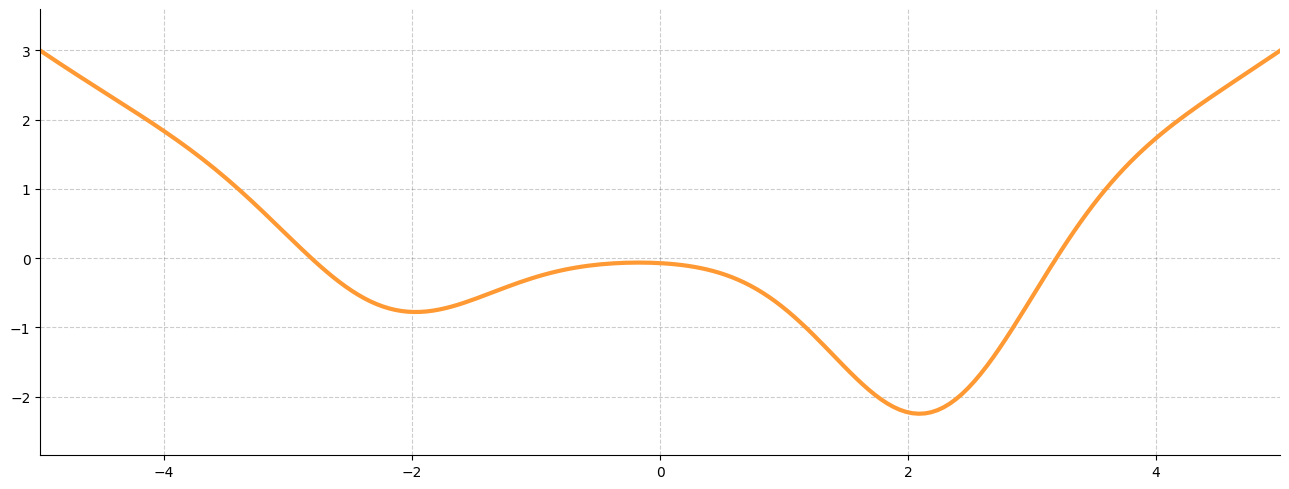

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# 1. 数据生成（损失曲线）
# --------------------------
x = np.linspace(-5, 5, 200)
# 定义损失曲线（局部最优+全局最优，全局最优损失更低）
y = 0.12 * (x**2)  # 基础曲面
y -= 1.3 * np.exp(-((x + 2.2)** 2) / 1.2)  # 左侧局部最优
y -= 2.8 * np.exp(-((x - 2.2)**2) / 1.2)  # 右侧全局最优（损失更低）

# 标记关键位置
local_x, local_y = -2.2, y[np.argmin(np.abs(x + 2.2))]  # 局部最优
global_x, global_y = 2.2, y[np.argmin(np.abs(x - 2.2))]  # 全局最优


# --------------------------
# 2. 绘图设置（黑色基调+橙色曲线）
# --------------------------
plt.figure(figsize=(13, 5))
orange_curve = (1, 0.6, 0.2)  # 橙色曲线（莫奈风格，柔和不刺眼）
black_base = (0, 0, 0)        # 黑色基调（坐标轴、文字等）


# --------------------------
# 3. 绘制核心元素
# --------------------------
# 3.1 网格背景（浅灰黑色，不干扰主体）
plt.grid(True, linestyle='--', alpha=0.2, color=black_base)

# 3.2 损失曲线（橙色，核心视觉元素）
plt.plot(x, y, color=orange_curve, linewidth=3, label='Loss Curve')

# 3.3 标记最优解（黑色边框+橙色填充，与曲线呼应）
# plt.scatter(local_x, local_y, color=orange_curve, s=120, 
#            edgecolors=black_base, zorder=5, label='Local Optimum')
# plt.scatter(global_x, global_y, color=orange_curve, s=150, 
#            edgecolors=black_base, marker='*', zorder=5, label='Global Optimum')


# --------------------------
# 4. 坐标轴与箭头（末尾箭头，黑色）
# --------------------------
ax = plt.gca()
# 隐藏上、右边框，保留左下边框（黑色）
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(black_base)
ax.spines['left'].set_color(black_base)

# x轴末尾箭头（右侧末端）
# ax.plot(1, 0, ls='', marker='>', ms=8, color=black_base, 
#         transform=ax.get_xaxis_transform(), clip_on=False)
# # y轴末尾箭头（上侧末端）
# ax.plot(0, 1, ls='', marker='^', ms=8, color=black_base, 
#         transform=ax.get_yaxis_transform(), clip_on=False)


# --------------------------
# 5. 标注（黑色文字，与方法关联）
# --------------------------
# plt.xlabel('Optimization Step', fontsize=10, color=black_base)
# plt.ylabel('Reconstruction Error', fontsize=10, color=black_base)
# plt.title('EIWR Optimization Path', fontsize=12, color=black_base)
# plt.legend(loc='upper right', labelcolor=black_base)

# # 标注与方法的关联（对应EIWR通过优化找到全局最优）
# plt.text(-1.5, local_y + 0.8, 'EIWR finds global optimum via efficient refinement', 
#          color=black_base, fontsize=9, bbox=dict(facecolor='white', alpha=0.7))

# 范围调整（确保曲线完整显示）
plt.xlim(-5, 5)
plt.ylim(min(y)-0.6, max(y)+0.6)

plt.tight_layout()

plt.savefig('/h3cstore_ns/jcxie/LISA/nips2024/get_plt/img/qvxian.svg', dpi=300, bbox_inches='tight')  # 保存为高分辨率PNG
plt.show()

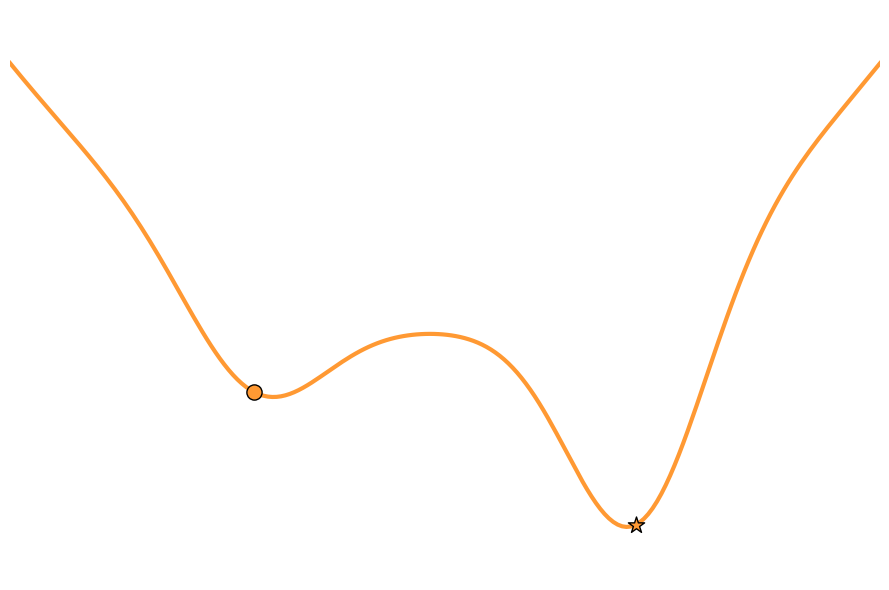

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# 1. 数据生成（损失曲线）
# --------------------------
x = np.linspace(-5, 5, 200)
y = 0.12 * (x**2)  # 基础曲面
y -= 1.3 * np.exp(-((x + 2.2)** 2) / 1.2)  # 左侧局部最优
y -= 2.8 * np.exp(-((x - 2.2)**2) / 1.2)  # 右侧全局最优

local_x, local_y = -2.2, y[np.argmin(np.abs(x + 2.2))]
global_x, global_y = 2.2, y[np.argmin(np.abs(x - 2.2))]


# --------------------------
# 2. 绘图设置
# --------------------------
plt.figure(figsize=(9, 6))
orange_curve = (1, 0.6, 0.2)  # 橙色曲线
black_base = (0, 0, 0)        # 黑色基调


# --------------------------
# 3. 绘制核心元素
# --------------------------
# 网格背景（浅灰黑色）
plt.grid(True, linestyle='--', alpha=0.2, color=black_base)

# 损失曲线（橙色，对应优化目标）
plt.plot(x, y, color=orange_curve, linewidth=3, label='Loss Curve')

# 标记最优解（与曲线配色呼应）
plt.scatter(local_x, local_y, color=orange_curve, s=120, 
           edgecolors=black_base, zorder=5, label='Local Optimum')
plt.scatter(global_x, global_y, color=orange_curve, s=150, 
           edgecolors=black_base, marker='*', zorder=5, label='Global Optimum')


# --------------------------
# 4. 移除坐标轴数字和箭头
# --------------------------
ax = plt.gca()
# 隐藏所有边框
for spine in ax.spines.values():
    spine.set_visible(False)
# 移除坐标轴刻度（数字）
ax.set_xticks([])
ax.set_yticks([])


# --------------------------
# 5. 范围调整
# --------------------------
plt.xlim(-5, 5)
plt.ylim(min(y)-0.6, max(y)+0.6)
plt.tight_layout()
plt.show()